# Analysis of Yelp Data


The Yelp dataset is a collection of user-generated reviews and associated data for businesses in various cities. The data includes information such as the business name, category, location, and rating, as well as the user ID and review text for each review. This data can be used to analyze patterns and trends in consumer behavior, business performance, and geographic locations. Additionally, the dataset provides an opportunity to explore the relationships between different variables, such as ratings, reviews, and business categories. This data can be leveraged to gain insights and make informed decisions in a variety of industries, including marketing, business management, and public policy.

Description of the variables of the data used here.

* __business_id__ - A unique identifier for each business in the dataset
* __business_categories__ - A list of categories associated with the business
* __business_city__ - The city where the business is located.
* __user_id__ - A unique identifier for each user who has written a review.
* __text__ - The text of the review.
* __stars__ - The user's rating towards the business
* __useful__ - The number of times the review was voted as useful.
* __date__ - The date the review was posted.

 # Q1. Check and remove missing data
 
### Q1.1 Write a Python code snippet that checks for missing values in each column of the dataset. If any, only display the names of the columns with missing values and their corresponding number of missing values. Print the length of the data before removing the missing data.

Note: Only output the number of missing values for the columns having at least one missing value!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline
import random


In [2]:
business = pd.read_csv('Yelp_Portfolio1_Input.csv')
row_length = len(business)
print("Length of data Before Removing the missing Data" + str(row_length))
missingCol = []
for r in business.columns:
    missingValue = business[r].isnull().sum()
    if missingValue>0:
        missingCol.append((r, missingValue))
if len(missingCol)>0:
    print("The columns which have missing Values:")
    for r,missingValue in missingCol:
        print("Column: "+r)
        print("Missing Values: "+ str(missingValue))

businessClean = business.dropna()
print("length of dataset after removing missing values: " +str(len(businessClean)))          


Length of data Before Removing the missing Data229907
The columns which have missing Values:
Column: business_categories
Missing Values: 777
Column: text
Missing Values: 6
length of dataset after removing missing values: 229124


### Q1.2 Remove any row that contains at least one missing value, and output the length of the resulting cleaned dataset; After that, remove any row that contain invalid value with either "#NAME?" or "#VALUE!" in the `business_id` and `user_id` columns, and output the length of the resulting cleaned dataset.

In [3]:
# Removing any row that contains at least one missing value and output the length of the resulting cleaned dataset

businessCleaned = businessClean[(businessClean["business_id"]!="#NAME?") & (businessClean["business_id"]!="#VALUE!") & (businessClean["user_id"]!="#NAME?") & (businessClean["user_id"]!="#VALUE!")]
print("The length of dataFrame after deleting invalid Values: " +str(len(businessCleaned)))
#print(businessCleaned)

The length of dataFrame after deleting invalid Values: 222759


# Q2. Random Subset Selection of Yelp Businesses by City

Selecting a random subset of cities from the Yelp business dataset and extracting all the rows corresponding to businesses located in those cities can be useful for various purposes. For example, it can be used to 
perform exploratory data analysis on a smaller subset of the dataset, which can be more manageable and faster to process than the entire dataset. Suppose you want to select a random subset of 10 cities from the dataset and extract all the rows that correspond to businesses located in those cities. At last, print the length of the resulting sample data. Write Python code that accomplishes this task.

Note: Use the $random.sample()$ function to select 10 random cities from the list of unique cities. Set the random seed to 42 before selecting the cities!!!

In [4]:
# 
np.random.seed(42)
uniqueCities = businessCleaned['business_city'].unique().tolist()
randomBusiness = np.random.choice(uniqueCities, size=10, replace = False)
#print(len(uniqueCities))
#print(randomBusiness)
randomCities = businessCleaned[businessCleaned['business_city'].isin(randomBusiness)]

print(randomCities)
print("Length of randomly selected cities businesses: "+str(len(randomCities)))



                                     business_categories business_city  \
0                        Breakfast & Brunch; Restaurants       Phoenix   
1                            Italian; Pizza; Restaurants       Phoenix   
6                                   Mexican; Restaurants       Phoenix   
7                              Hotels & Travel; Airports       Phoenix   
8                                Sushi Bars; Restaurants       Phoenix   
...                                                  ...           ...   
229897           Bakeries; Food; Sandwiches; Restaurants       Phoenix   
229899                              Car Wash; Automotive       Phoenix   
229900                   Breakfast & Brunch; Restaurants       Phoenix   
229901  Event Planning & Services; Venues & Event Spaces       Phoenix   
229906                 Churches; Religious Organizations       Phoenix   

                   business_id       date  stars  \
0       9yKzy9PApeiPPOUJEtnvkg  26/1/2011      5   
1      

# Q3. Descriptive statistics on the data output from Q2
### Q3.1 Compute summary statistics for the `stars` column of the sample data
Note: the resulting output includes the count, mean, standard deviation, minimum, maximum values of the column.

In [5]:
# mean
count = len(randomCities['stars'])
mean = randomCities['stars'].mean()
standardDeviation= np.std(randomCities['stars'])
minValue = max(randomCities["stars"])
maxValue = min(randomCities["stars"])

print("Count of the Stars Column: " +str(count))
print("Mean of column: "+str(mean))
print("Standard Deviation fo star column: " +str(standardDeviation))
print("Minimum value of stars column:" +str(minValue))
print("Maximun value of stars column: " +str(maxValue))


Count of the Stars Column: 101069
Mean of column: 3.788055684730234
Standard Deviation fo star column: 1.2002538460105152
Minimum value of stars column:5
Maximun value of stars column: 1


### Q3.2 For each city in the dataframe, how many unique businesses are there?

Note: the resulting dataframe has two columns: `business_city` and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [6]:
# your code and solutions
#use groupby function

new_business = randomCities.groupby(['business_city'])['business_categories'].nunique().reset_index()
new_business.columns = ['business_city','count']
print(new_business)
count1 = len(new_business['count'])
mean = new_business['count'].mean()
standardDeviation= np.std(new_business['count'])
minValue = max(new_business["count"])
maxValue = min(new_business["count"])

print("Count of the Column: " +str(count1))
print("Mean of column: "+str(mean))
print("Standard Deviation of column: " +str(standardDeviation))
print("Minimum value of column:" +str(minValue))
print("Maximun value of column: " +str(maxValue))

  business_city  count
0     Ahwatukee      3
1      Avondale     88
2   Casa Grande     35
3      Florence     10
4       Gilbert    229
5   Gold Canyon      9
6        Higley      5
7   North Pinal      1
8       Phoenix   1074
9        Tucson      1
Count of the Column: 10
Mean of column: 145.5
Standard Deviation of column: 316.764975967988
Minimum value of column:1074
Maximun value of column: 1


### Q3.3 For each business category and business ID combination in the dataframe, how many unique users have rated the business?

Note: the resulting dataframe has three columns: `business_categories`, `business_id`, and `count`. Compute summary statistics (similar as Q 3.1) for the `count` column.

In [7]:
#
uniqueBusinessUser = randomCities.groupby(['business_categories','business_id'])['user_id'].nunique().reset_index()
uniqueBusinessUser.columns = ['business_categories','business_id','count']
print(uniqueBusinessUser)
uniqueBusinessUser_summary = uniqueBusinessUser['count'].describe()
print(uniqueBusinessUser_summary)

                                    business_categories  \
0                    Accountants; Professional Services   
1                    Accountants; Professional Services   
2     Accountants; Professional Services; Financial ...   
3     Accountants; Professional Services; Tax Servic...   
4                                           Active Life   
...                                                 ...   
4645  Women's Clothing; Men's Clothing; Fashion; Sho...   
4646  Women's Clothing; Plus Size Fashion; Fashion; ...   
4647  Women's Clothing; Used, Vintage & Consignment;...   
4648  Women's Clothing; Used, Vintage & Consignment;...   
4649  Yoga; Beauty & Spas; Food; Juice Bars & Smooth...   

                 business_id  count  
0     2k1I66IxKL9vJnRQhXWkDQ      4  
1     T7acIuznS5juLqB-iUQFlg      3  
2     v5jl0e2gR1dBENyFM6ZWPw      3  
3     FYfh6ZwOovpZvmSHa4DRRA      3  
4     EwRpc3Jt9LvTXhIcsCPUIg      6  
...                      ...    ...  
4645  mqnDe6r517vcmOa3tyy

# Q4. Plotting and Analysis

Explore the distribution of each variable, or the correlation between the `business_city`, `useful`,`business_categories` or `other variables` and the `stars` column in both the cleaned dataset from Q1 and the sampled dataset from Q2. For instance, does some cities tend to provide higher stars than others? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___).
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the Yelp data.

Analysis and observation are open, and require you to think critically and analyze data to develop your own insights and conclusions. It's important for you to analyze the data, identify patterns, draw your own conclusions, and communicate your findings. This fosters critical thinking skills, ownership of learning, and a deeper understanding of the data.

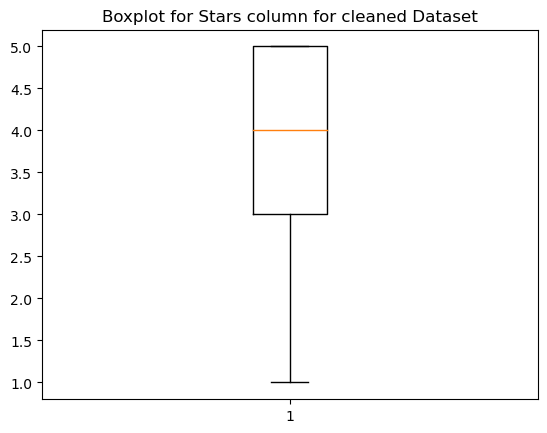

In [8]:
#
#box plot of stars column for cleaned Dataset in Q1
import seaborn as s
plt.boxplot(x='stars', data=businessCleaned)
plt.title("Boxplot for Stars column for cleaned Dataset")
plt.show()

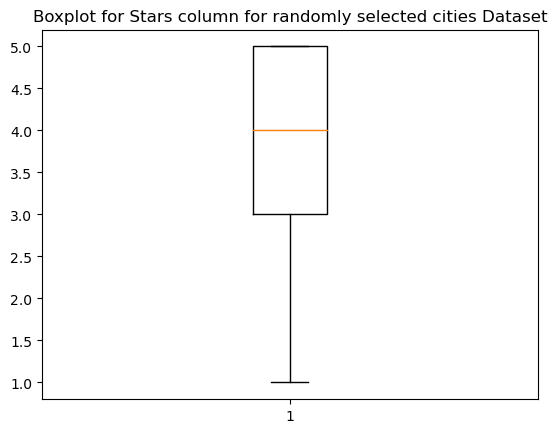

In [9]:
plt.boxplot(x='stars', data=randomCities)
plt.title("Boxplot for Stars column for randomly selected cities Dataset")
plt.show()

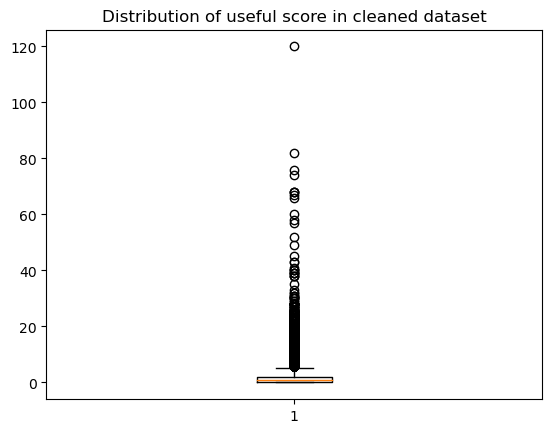

In [10]:
plt.boxplot(x='useful', data = businessClean)
plt.title('Distribution of useful score in cleaned dataset')
plt.show()

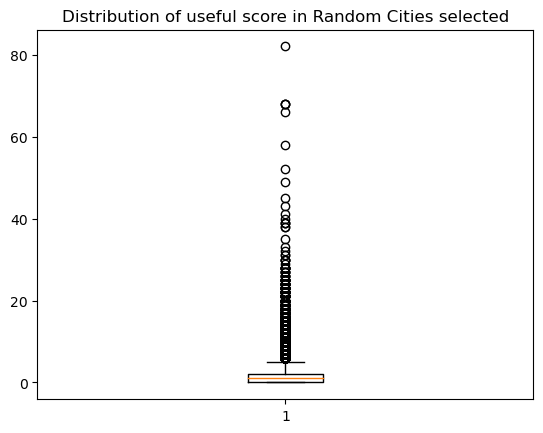

In [11]:
plt.boxplot(x='useful', data = randomCities)
plt.title('Distribution of useful score in Random Cities selected')
plt.show()

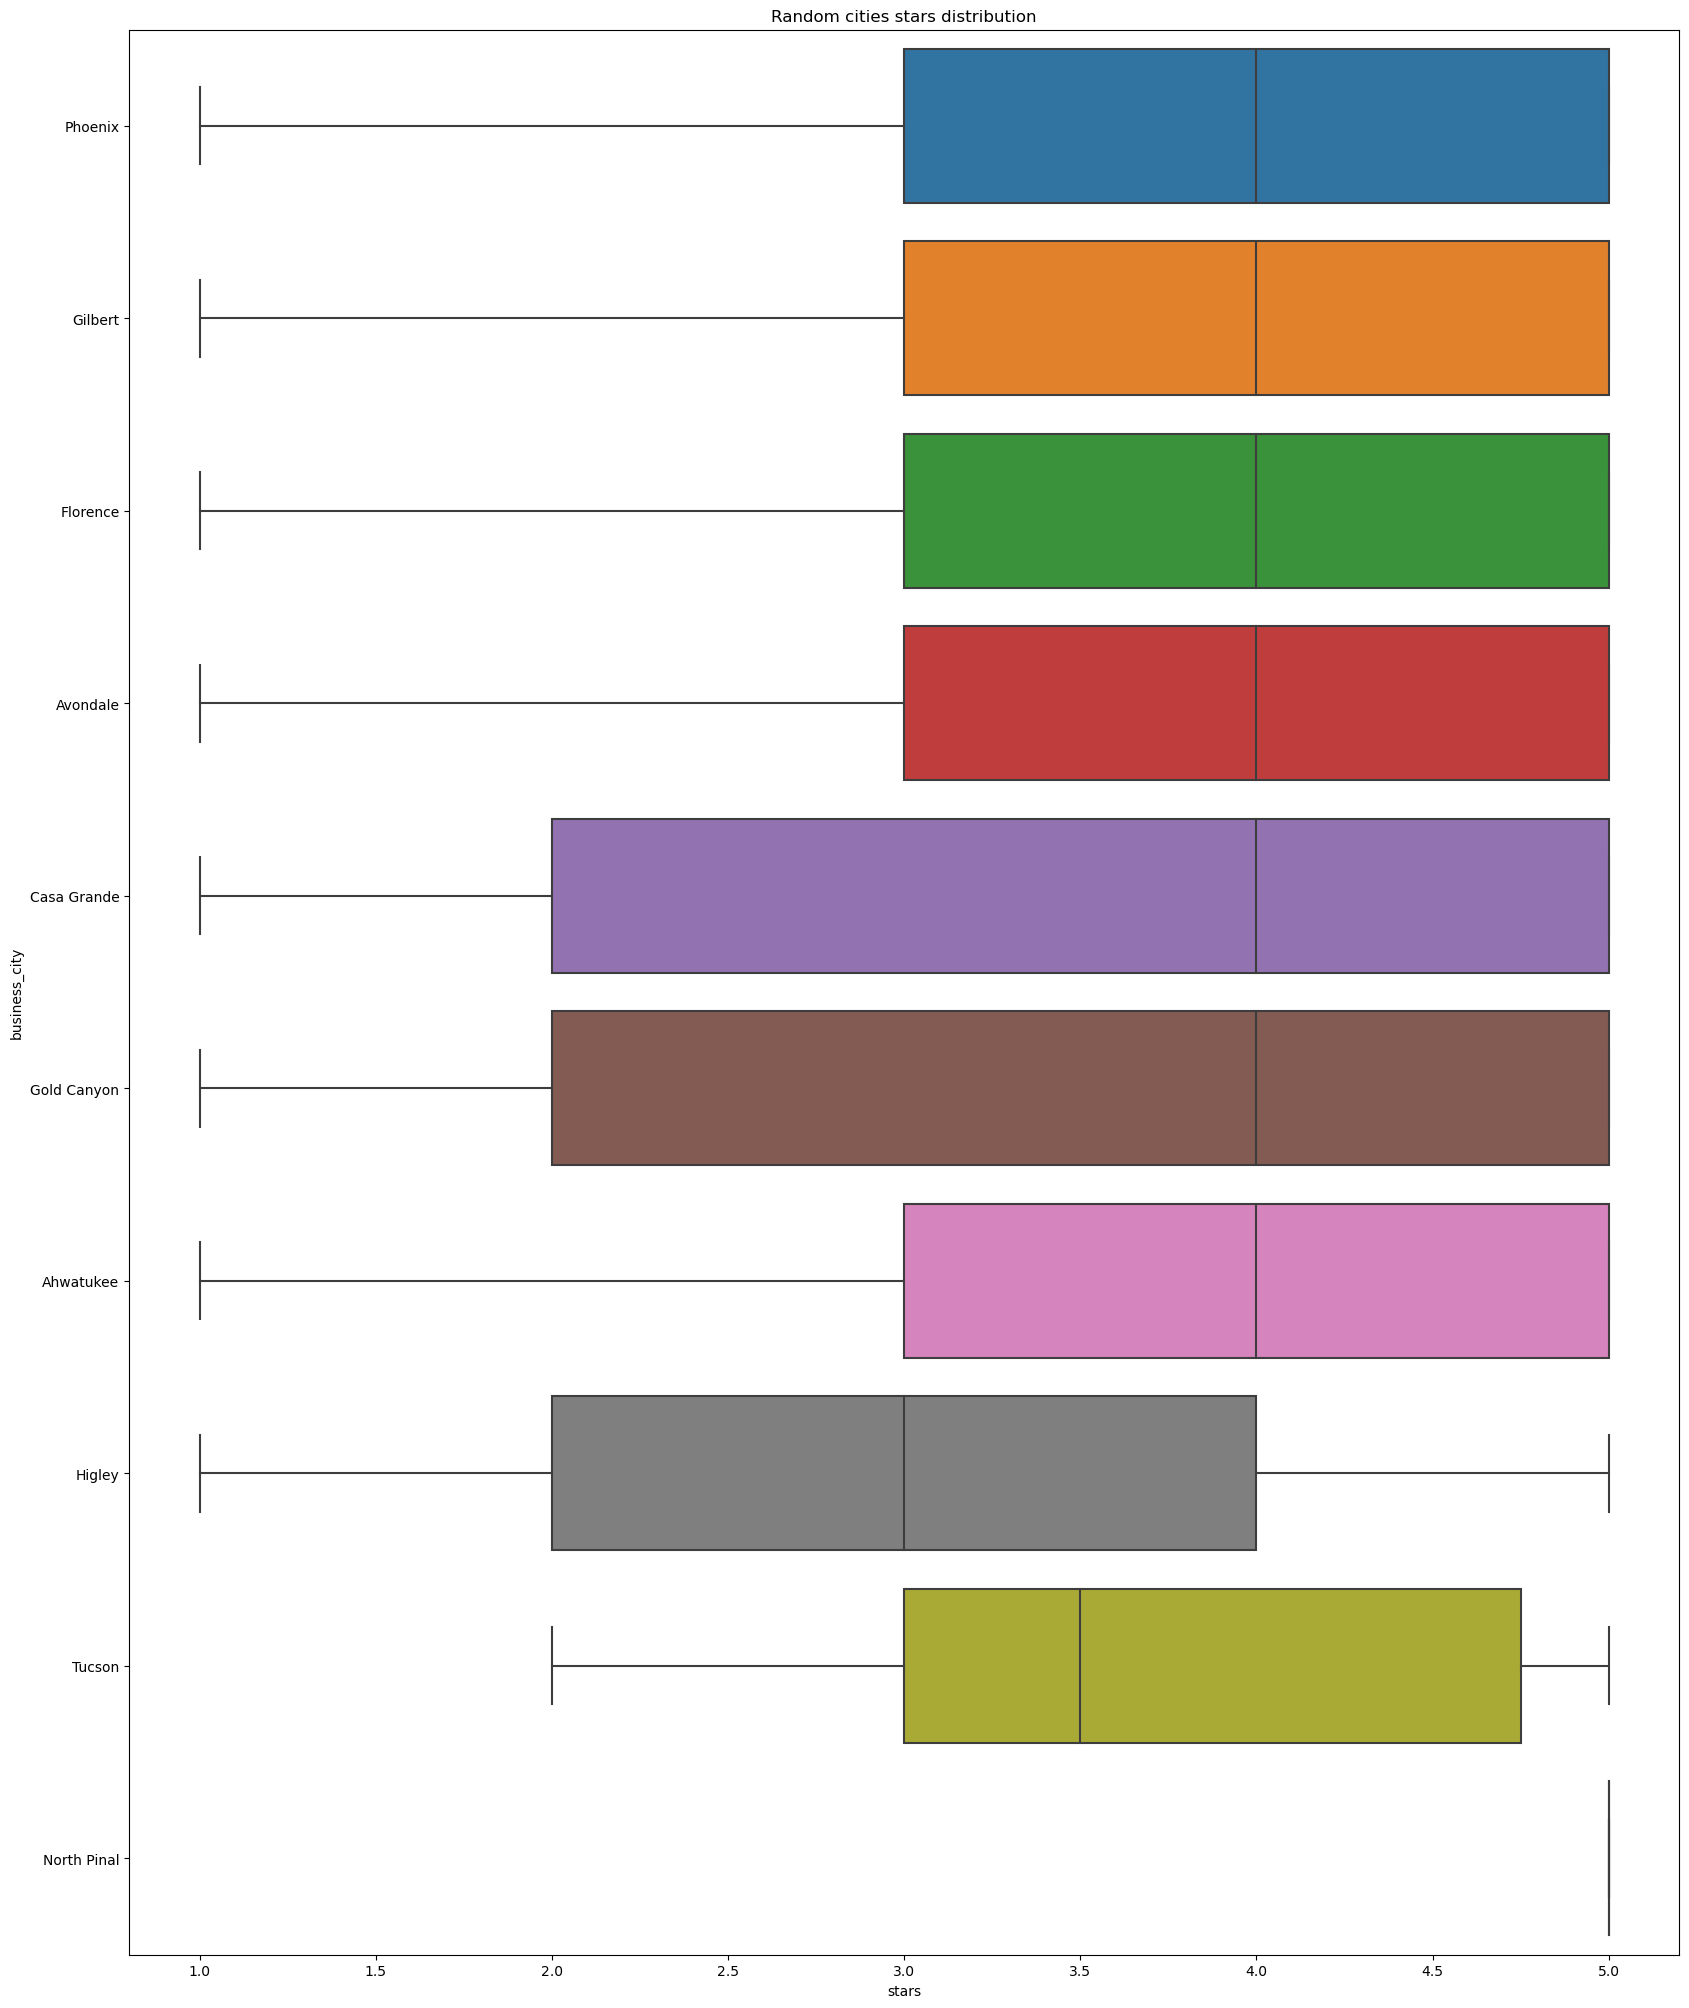

In [12]:
plt.figure(figsize=(20,25))
s.boxplot(x='stars', y='business_city', data = randomCities)
plt.title("Random cities stars distribution")
plt.xlabel("stars", size=10)
plt.show()

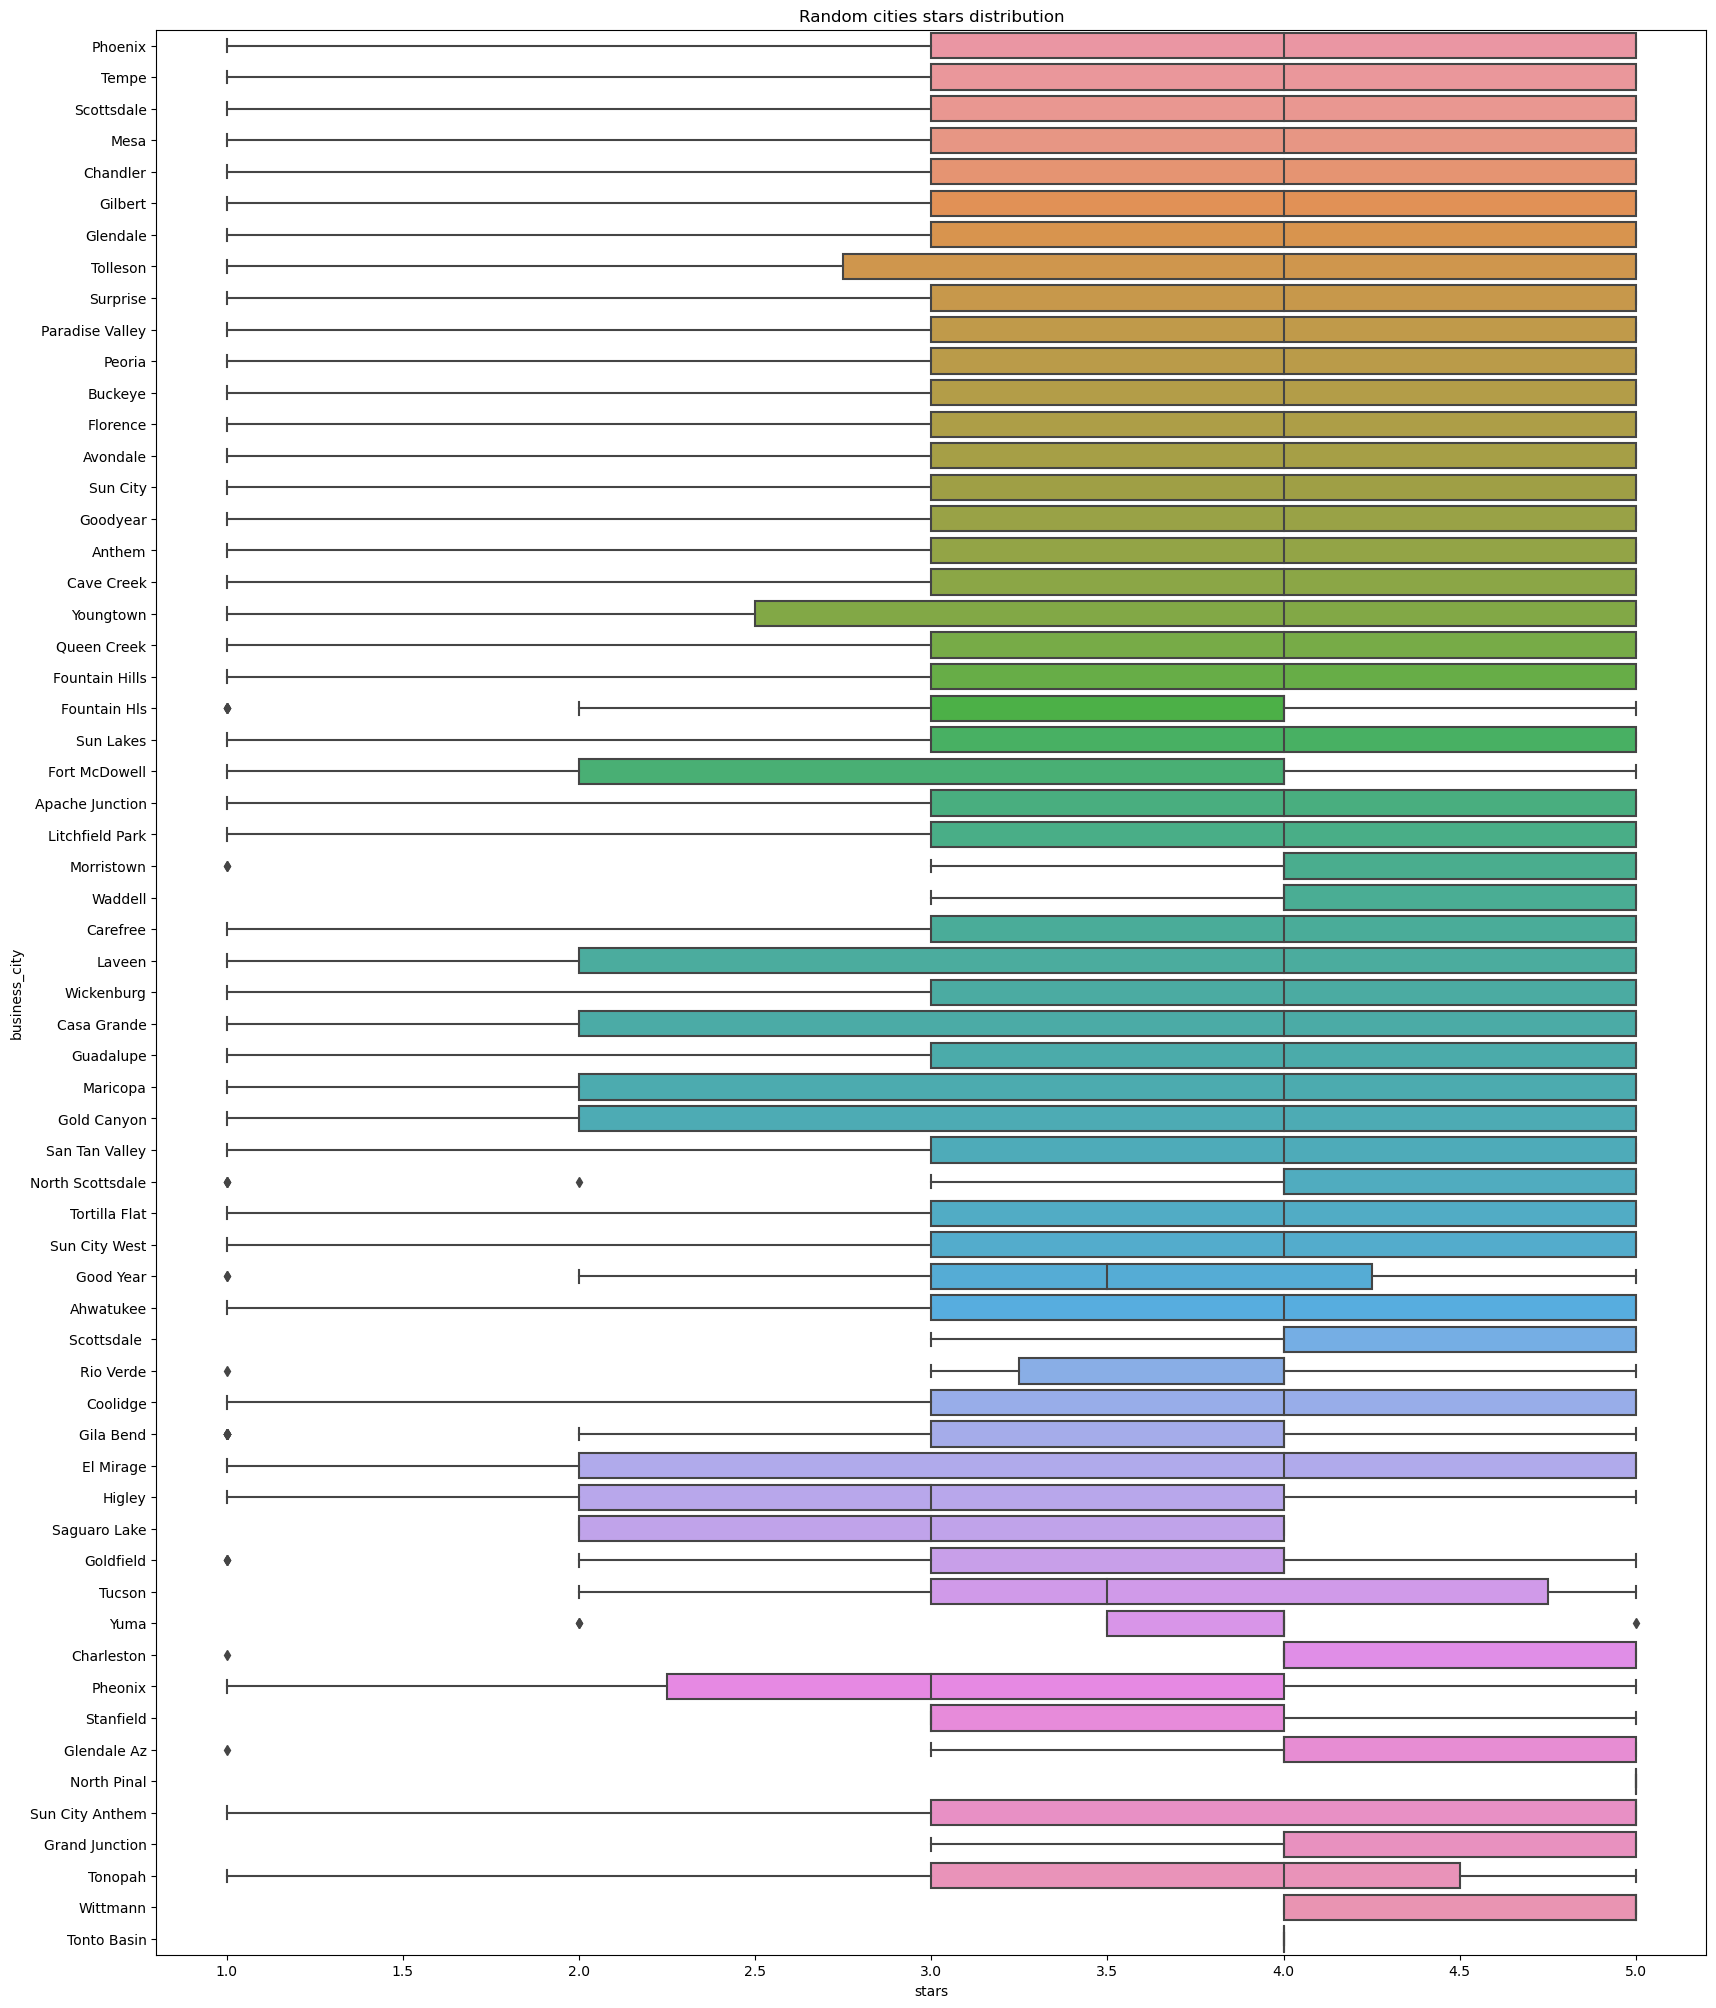

In [13]:
plt.figure(figsize=(20,25))
s.boxplot(x='stars', y='business_city', data = businessCleaned)
plt.title("Random cities stars distribution")
plt.xlabel("stars", size=10)
plt.show()

In [10]:
corelation = businessCleaned.corr()
print(corelation)

           stars    useful
stars   1.000000 -0.033372
useful -0.033372  1.000000


In [12]:
corr1 = randomCities.corr()
print(corr1)

           stars    useful
stars   1.000000 -0.028641
useful -0.028641  1.000000


In [13]:
#correlation between stars and business city for cleaned dataset
from scipy.stats import spearmanr
col1 = businessCleaned['business_city']
col2 = businessCleaned['stars']
rho, pval = spearmanr(col1, col2)
print("Spearman's rank correlation coefficient: " +str(rho))
print("p-value: "+str(pval))

D:\Anaconda\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


Spearman's rank correlation coefficient: -0.008825587259014446
p-value: 3.1066929926620344e-05


In [14]:
#correlation between stars and business city for randomly selected cities
col1 = randomCities['business_city']
col2 = randomCities['stars']
rho, pval = spearmanr(col1, col2)
print("Spearman's rank correlation coefficient: " +str(rho))
print("p-value: "+str(pval))

Spearman's rank correlation coefficient: -0.00903894697674345
p-value: 0.004057885112162021


In [16]:
#correlation between business categories and stars for randomly selected cities
col1 = randomCities['business_categories']
col2 = randomCities['stars']
rho, pval = spearmanr(col1, col2)
print("Spearman's rank correlation coefficient: " +str(rho))
print("p-value: "+str(pval))

Spearman's rank correlation coefficient: 0.009018271111991449
p-value: 0.004143135411463052


In [15]:
#correlation between business categories and stars for cleaned dataset
col1 = businessCleaned['business_categories']
col2 = businessCleaned['stars']
rho, pval = spearmanr(col1, col2)
print("Spearman's rank correlation coefficient: " +str(rho))
print("p-value: "+str(pval))

Spearman's rank correlation coefficient: 0.01295046881503205
p-value: 9.808211967296473e-10


# Summary 

1. Yelp datset has around 229907 records and 777 rows are empty for business category column and 6 rows in text column are empty. After filtering, the dataset has 229124 records.
2. This dataset has median of 4 in stars rating column for both randomly selected cities and cleaned sample dataset.
3. From boxplot of all cities we can determine that, for most of cities median value of stars comes around 4 and spread of around 90% of these cities are from 3-5.
4. When is comes to correlation between stars column and usefull column, it has negative corelation of -0.033372 for cleaned dataset and  -0.028641 for randomly selected cities which means value of stars increases as useful column decreases in value and vice-versa. 
5. when it comes to business_city correlation value is very minimal meaning it will have low impact on each other. Same goes with business categories for randomly selected cities as value is very close to zero. But for cleaned dataset, correlation value is relatively higher than compared to other correlation coefficent.
6. For useful column boxplot we can see outliers for both randomly selected dataset and for cleaned dataset. Upper-fence, lower fence, speard of plots and median are same for both of the datasets
7. For stars column we can see a few outlies for few cities which are at 1 and 2 but when we look at whole data these outliers can be ignored as it has no effect on the dataset and medians.
8. These plots are linear. 